2023-04-28 00:41:59.453912: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-28 00:41:59.455533: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 00:41:59.492688: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 00:41:59.493406: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 00:42:00.312679: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Epoch 1/30


2023-04-28 00:42:03.204981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 00:42:03.206688: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 00:42:03.207982: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

361/361 - 13s - loss: 0.0381 - val_loss: 0.0031 - 13s/epoch - 36ms/step
Epoch 2/30
361/361 - 5s - loss: 0.0048 - val_loss: 0.0012 - 5s/epoch - 14ms/step
Epoch 3/30
361/361 - 6s - loss: 0.0040 - val_loss: 7.1114e-04 - 6s/epoch - 16ms/step
Epoch 4/30
361/361 - 7s - loss: 0.0038 - val_loss: 0.0010 - 7s/epoch - 18ms/step
Epoch 5/30
361/361 - 6s - loss: 0.0031 - val_loss: 0.0011 - 6s/epoch - 18ms/step
Epoch 6/30
361/361 - 7s - loss: 0.0030 - val_loss: 0.0011 - 7s/epoch - 20ms/step
Epoch 7/30
361/361 - 7s - loss: 0.0026 - val_loss: 3.9358e-04 - 7s/epoch - 20ms/step
Epoch 8/30
361/361 - 7s - loss: 0.0027 - val_loss: 4.4249e-04 - 7s/epoch - 21ms/step
Epoch 9/30
361/361 - 7s - loss: 0.0024 - val_loss: 3.7404e-04 - 7s/epoch - 20ms/step
Epoch 10/30
361/361 - 7s - loss: 0.0022 - val_loss: 3.2841e-04 - 7s/epoch - 20ms/step
Epoch 11/30
361/361 - 7s - loss: 0.0020 - val_loss: 5.0787e-04 - 7s/epoch - 20ms/step
Epoch 12/30
361/361 - 7s - loss: 0.0020 - val_loss: 8.8397e-04 - 7s/epoch - 20ms/step
Epoch 

2023-04-28 00:45:45.634664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 00:45:45.639804: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 00:45:45.642946: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

121/121 [==============================] - 3s 7ms/step
Train Score: 0.10 RMSE
Test Score: 0.08 MAE


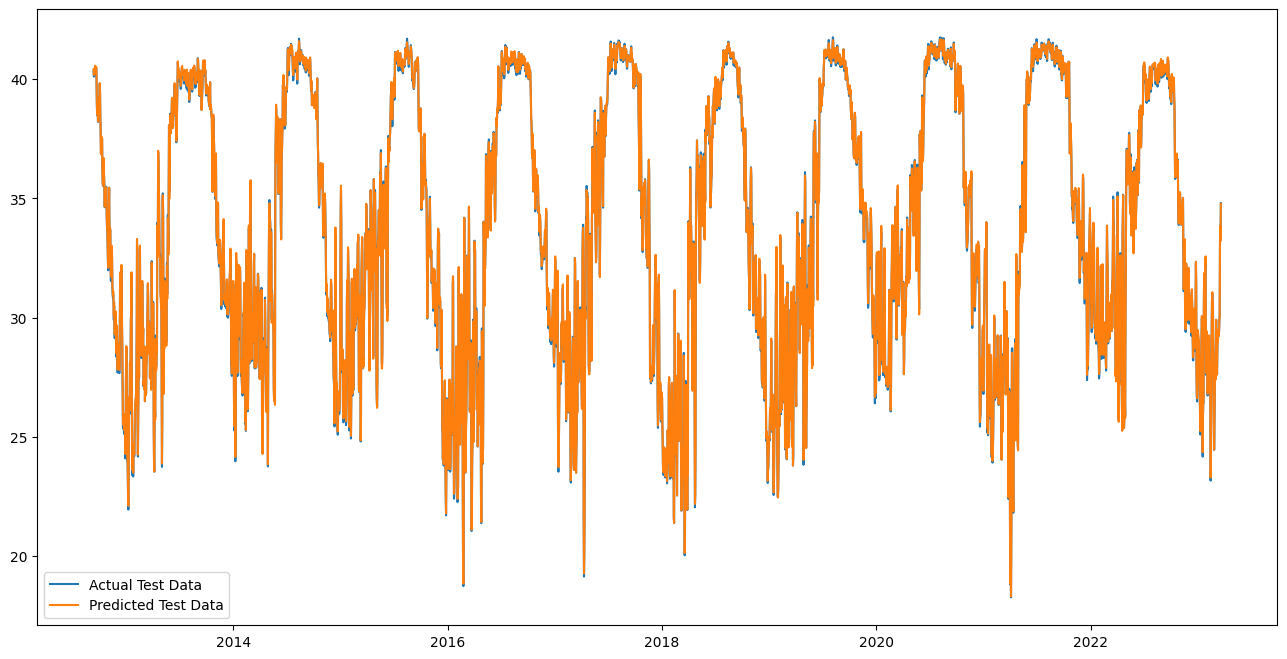

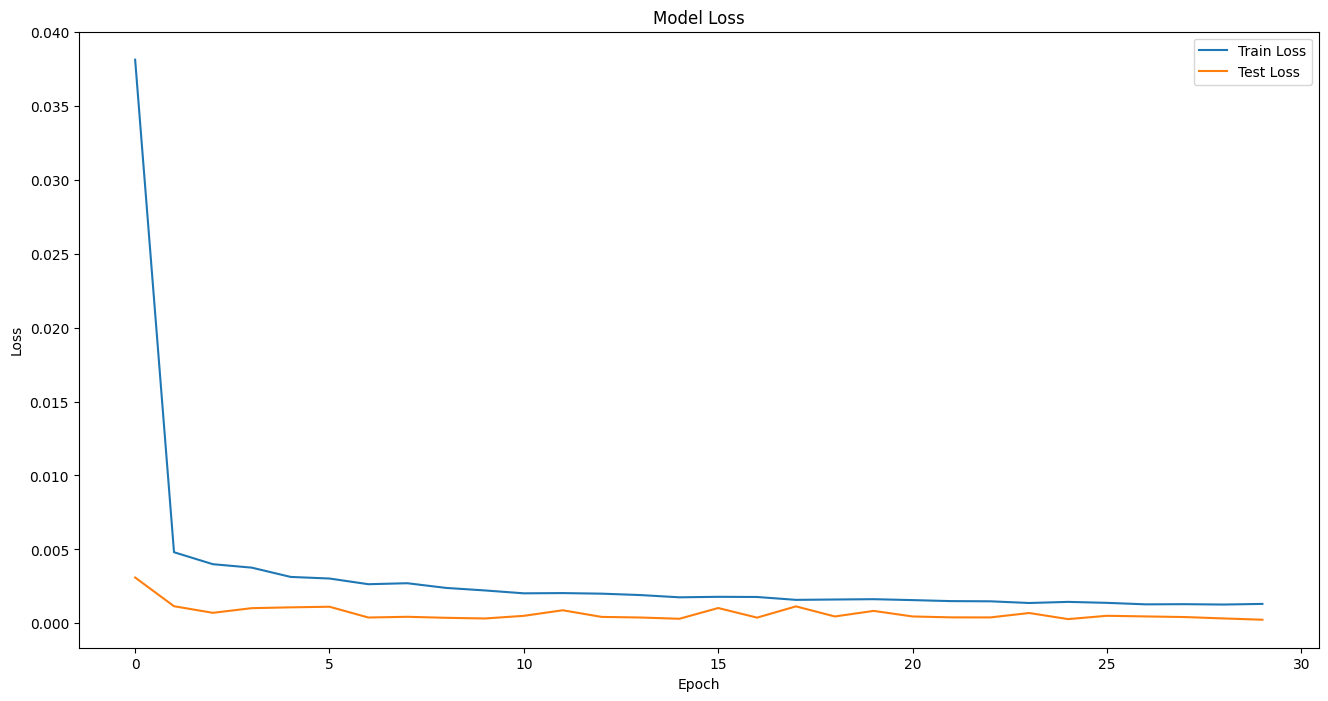

In [1]:
from model import *
from data_utils import *
from visualization import *
from data_preprocessing import *

# load and preprocess data
df = preprocess_data('../Dataset/Patna.csv')

# split data into train and test sets
train, test = split_train_test(df)

# scale data
scaler, train_scaled, test_scaled = scale_data(train, test)

# prepare data for LSTM model
n_steps_in = 7
n_steps_out = 1
trainX, trainY = prepare_data(train_scaled, n_steps_in, n_steps_out)
testX, testY = prepare_data(test_scaled, n_steps_in, n_steps_out)

# define and fit the LSTM model
model = build_model(trainX, n_steps_in, n_steps_out)
history = model.fit(trainX, trainY, epochs=30, batch_size=32, validation_data=(testX, testY), verbose=2)

# # make predictions and evaluate the model
rmseScore, maeScore, predictTemp, realTemp = evaluate_model(model, scaler, testX, testY)
print('Train Score: %.2f RMSE' % (rmseScore))
print('Test Score: %.2f MAE' % (maeScore))

# # plot the predicted and actual temperatures
date = df.tail(realTemp.shape[0]).index
plot_train_test_predictions(realTemp, predictTemp, date)
plot_loss(history)